# **Forecasting Racial Wage Trends by Industry (2019–2025)**

**Objective:**

This project aims to forecast average monthly wages across different racial groups and industries in the U.S. Using census wage data from 2019–2023, I built a model to predict wages in 2024 and 2025 (which have not been published by the QWI Explorer as of May 2025). The goal was to explore how racial wage gaps vary across industries and how they might shift in the near future.

**Data Sources:**

The data comes from the U.S. Census Bureau’s Quarterly Workforce Indicators [(QWI) Explorer](https://https://qwiexplorer.ces.census.gov/), which reports monthly wages earned in the overall United States by race and industry. I exported and compiled annual averages from 2019 to 2023 for all census racial groups and NAICS sectors from the QWI Explorer. Organizing average monthly US wages (across race, time, and industry) into one excel dataset [here](https://docs.google.com/spreadsheets/d/e/2PACX-1vTEfTk4p1fh2XMe9S81HEoS-D5nOk5JAtjA3PrcSj-nTkqMfGz3wslaOvLaPapsRA/pubhtml?gid=888127578&single=true).

Summary of Key Variables

Race/Ethnicity:
* White Alone
* Black or African American Alone
* Hispanic or Latino
* Asian Alone
* American Indian or Alaska Native Alone
* Native Hawaiian or Other Pacific Islander Alone
* Two or More Race Groups

Industry: Based on NAICS sectors (e.g., Manufacturing, Finance, Retail)

Variable of Interest: Average Monthly Wages (by group and year)

Time Frame: 2019–2023 historical data used to forecast 2024–2025



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Load data
df = pd.read_excel("/content/Reshaped_wage_data_2019_2023.xlsx")

# Step 2: Drop missing values and make sure Year is int
df = df.dropna()
df['Year'] = df['Year'].astype(int)

# Step 3: Create a list to store results
results = []

# Step 4: Loop through each Race × Industry combination
groups = df.groupby(['Race', 'Industry'])

for (race, industry), group in groups:
    # Train a simple linear model: Year → Avg_Wage
    X = group[['Year']]
    y = group['Avg_Wage']

    if len(group) >= 2:  # Only fit if there's enough data
        model = LinearRegression()
        model.fit(X, y)

        # Predict for 2024 and 2025
        future_years = pd.DataFrame({'Year': [2024, 2025]})
        preds = model.predict(future_years)

        # Store results
        for year, pred in zip([2024, 2025], preds):
            results.append({
                'Year': year,
                'Race': race,
                'Industry': industry,
                'Predicted_Wage': round(pred, 2)
            })

# Step 5: Turns results into DataFrame
pred_df = pd.DataFrame(results)

# Step 6: Save to Excel
pred_df.to_excel("simple_predictions_2024_2025.xlsx", index=False)

# Show preview
print(pred_df.head())



   Year                                    Race  \
0  2024  American Indian or Alaska Native Alone   
1  2025  American Indian or Alaska Native Alone   
2  2024  American Indian or Alaska Native Alone   
3  2025  American Indian or Alaska Native Alone   
4  2024  American Indian or Alaska Native Alone   

                                            Industry  Predicted_Wage  
0                    Accommodation and Food Services          2563.6  
1                    Accommodation and Food Services          2722.4  
2  Administrative and Support and Waste Managemen...          4012.5  
3  Administrative and Support and Waste Managemen...          4244.0  
4         Agriculture, Forestry, Fishing and Hunting          3739.4  


**Methods and Approach:**

* Reshaped and cleaned Excel wage data by year, race, and industry
* Coded the predictions to create and save and excel file titled "simple_predictions" to simplify analyzing results [here](https://docs.google.com/spreadsheets/d/e/2PACX-1vRT0FeNinCwvrur6-q32b4g7gk0v1wEJpMkzGOLu3ayPHFft4uWnSEvFJugMH9sPQ/pubhtml).
* Used Python’s scikit-learn to fit simple linear regression models for each Race × Industry group
* Forecasted wages for 2024 and 2025 using trendlines
* Visualized wage patterns across race and industry with matplotlib


📊 Full Predictions:
     Year                                    Race  \
0    2024  American Indian or Alaska Native Alone   
1    2025  American Indian or Alaska Native Alone   
2    2024  American Indian or Alaska Native Alone   
3    2025  American Indian or Alaska Native Alone   
4    2024  American Indian or Alaska Native Alone   
..    ...                                     ...   
261  2025                             White Alone   
262  2024                             White Alone   
263  2025                             White Alone   
264  2024                             White Alone   
265  2025                             White Alone   

                                              Industry  Predicted_Wage  
0                      Accommodation and Food Services          2563.6  
1                      Accommodation and Food Services          2722.4  
2    Administrative and Support and Waste Managemen...          4012.5  
3    Administrative and Support and Waste Manageme

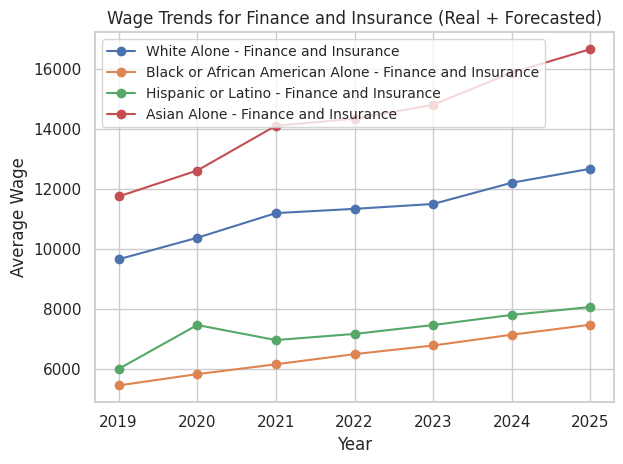

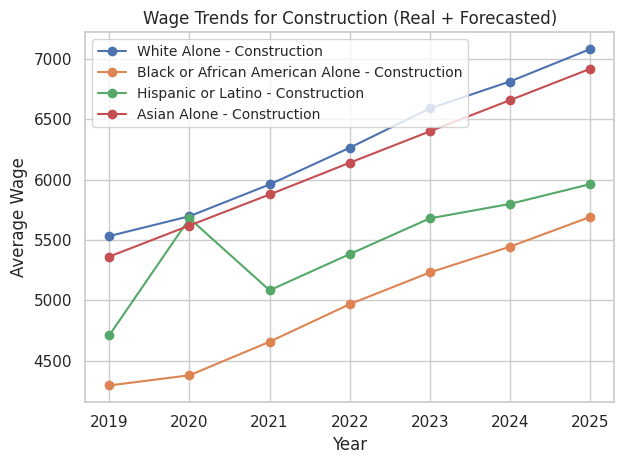

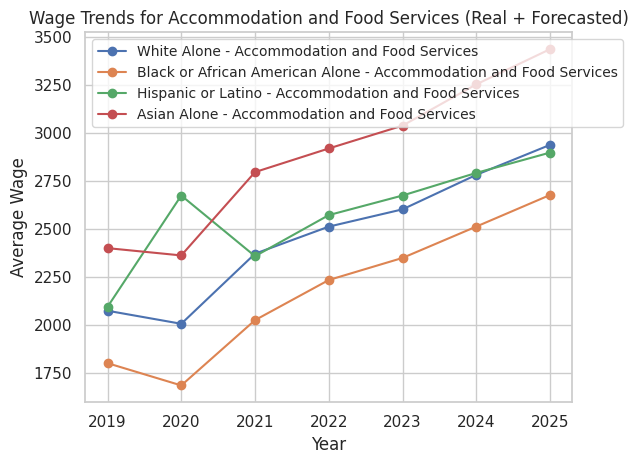

In [ ]:
# Visualizing this data #
import matplotlib.pyplot as plt

# Step 1: Show full prediction table
print("\n📊 Full Predictions:")
print(pred_df)

# Step 2: Pivot to show table-like structure (Race + Industry in rows, Year in columns)
pivot_table = pred_df.pivot_table(index=['Race', 'Industry'], columns='Year', values='Predicted_Wage')
print("\n📋 Pivot Table (Race × Industry by Year):")
print(pivot_table)

# Step 3: Plot a few example trends
# Choose a few race/industry pairs to visualize
examples = [
    ('White Alone', 'Finance and Insurance'),
    ('Black or African American Alone', 'Finance and Insurance'),
    ('Hispanic or Latino', 'Finance and Insurance'),
    ('Asian Alone', 'Finance and Insurance')
]

# Pull original data and add predictions
df_all = pd.concat([df[['Year', 'Race', 'Industry', 'Avg_Wage']].rename(columns={'Avg_Wage': 'Wage'}),
                    pred_df.rename(columns={'Predicted_Wage': 'Wage'})],
                   ignore_index=True)

# Plots each example
for race, industry in examples:
    subset = df_all[(df_all['Race'] == race) & (df_all['Industry'] == industry)]
    plt.plot(subset['Year'], subset['Wage'], marker='o', label=f"{race} - {industry}")

plt.title("Wage Trends for Finance and Insurance (Real + Forecasted)")
plt.xlabel("Year")
plt.ylabel("Average Wage")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 3.2: Plot different example trends
# Choose a few race/industry pairs to visualize
examples = [
    ('White Alone', 'Construction'),
    ('Black or African American Alone', 'Construction'),  # Completely customizable. Just fill race category and industry to compare.
    ('Hispanic or Latino', 'Construction'),
    ('Asian Alone', 'Construction')
]

# Pull original data and add predictions
df_all = pd.concat([df[['Year', 'Race', 'Industry', 'Avg_Wage']].rename(columns={'Avg_Wage': 'Wage'}),
                    pred_df.rename(columns={'Predicted_Wage': 'Wage'})],
                   ignore_index=True)

# Plots each example
for race, industry in examples:
    subset = df_all[(df_all['Race'] == race) & (df_all['Industry'] == industry)]
    plt.plot(subset['Year'], subset['Wage'], marker='o', label=f"{race} - {industry}")

plt.title("Wage Trends for Construction (Real + Forecasted)")
plt.xlabel("Year")
plt.ylabel("Average Wage")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 3.3: Plot different example trends
# Choose a few race/industry pairs to visualize
examples = [
    ('White Alone', 'Accommodation and Food Services'),
    ('Black or African American Alone', 'Accommodation and Food Services'),
    ('Hispanic or Latino', 'Accommodation and Food Services'),
    ('Asian Alone', 'Accommodation and Food Services')
]

# Pull original data and add predictions
df_all = pd.concat([df[['Year', 'Race', 'Industry', 'Avg_Wage']].rename(columns={'Avg_Wage': 'Wage'}),
                    pred_df.rename(columns={'Predicted_Wage': 'Wage'})],
                   ignore_index=True)

# Plots each example
for race, industry in examples:
    subset = df_all[(df_all['Race'] == race) & (df_all['Industry'] == industry)]
    plt.plot(subset['Year'], subset['Wage'], marker='o', label=f"{race} - {industry}")

plt.title("Wage Trends for Accommodation and Food Services (Real + Forecasted)")
plt.xlabel("Year")
plt.ylabel("Average Wage")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()



**Key Findings/Results:**

* Finance and Insurance had some of the highest predicted wages, especially for White and Asian workers.
* Construction, Retail, and Food Services consistently showed lower predicted wages across all racial groups.
* Black and Hispanic workers had lower predicted wages than White counterparts in most industries.
* The wage gaps remain persistent across sectors, with no indication of convergence by 2025.
* Visualizations revealed sharp group disparities in high-paying sectors like Information and Utilities.




Reflection

Challenges:
* Managing group-by modeling for multiple Race × Industry combinations
* Keeping the code readable and functional as a beginner

What I Learned:

* How to forecast with basic linear regression models using python

* How to reshape real-world data for time-series analysis


What I Would Do Differently:

* Adjust for inflation to analyze real wage changes.

* Try nonlinear models like Random Forest to capture complexity.

* Explore wage trends at the state level for more geographically specific insights.